In [2]:
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
gdp = pd.read_csv("gdp.csv", thousands=',',delimiter='\t', encoding='latin1', na_values="n/a")
bli = pd.read_csv('BLI.csv', thousands=',')

In [4]:
# Data Preprocessing
bli = bli[bli['INEQUALITY']=='TOT'] # Had to do it to avoid duplicates
bli = bli.pivot(index='Country', columns='Indicator', values='Value')
gdp.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp.set_index('Country', inplace=True)

In [5]:
full_country_stats = pd.merge(left=bli, right=gdp,
                                  left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
full_country_stats

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
South Africa,22.0,37.0,43.0,18.68,43.0,36.1,10.0,10872.0,17042.0,18.0,...,14.73,73.0,69.0,15.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",5694.572,2014.0
Brazil,10.0,6.7,49.0,7.15,64.0,37.3,27.6,12227.0,7102.0,20.0,...,14.45,79.0,72.0,15.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,16.0,4.2,37.0,29.48,61.0,45.9,17.9,13891.0,4750.0,21.0,...,12.74,63.0,67.0,14.8,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,13.8,95.0,0.16,70.0,52.2,11.3,16657.0,2260.0,19.0,...,14.90,65.0,54.0,16.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,20.0,6.5,39.0,33.77,51.0,60.6,1.7,17067.0,4429.0,20.0,...,12.59,85.0,63.0,17.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,19.0,4.3,83.0,3.05,67.0,50.7,1.2,16821.0,23289.0,18.0,...,15.06,62.0,76.0,16.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Poland,22.0,2.7,91.0,6.68,65.0,66.3,0.8,18906.0,14997.0,23.0,...,14.42,55.0,80.0,17.7,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.334,2014.0
Chile,16.0,9.4,65.0,10.06,62.0,51.1,4.5,16588.0,21409.0,18.0,...,14.90,49.0,69.0,17.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Latvia,11.0,12.9,89.0,2.09,69.0,60.7,6.6,15269.0,17105.0,23.0,...,13.83,59.0,77.0,17.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13618.569,2015.0


In [6]:
X = np.c_[full_country_stats["GDP per capita"]]
y = np.c_[full_country_stats["Life satisfaction"]]

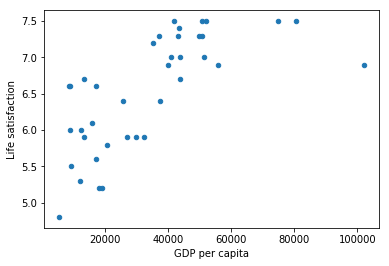

In [7]:
full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')


In [24]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
model = LinearRegression(normalize=True)


In [25]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [26]:
X_new = [[22587]]

In [27]:
print(model.predict(X_new))

[[6.24626328]]


In [31]:
model1 = KNeighborsRegressor(n_neighbors=3)
model1.fit(X, y)
print(model1.predict(X_new))

[[5.8]]


In [32]:

model2 = LinearRegression()
model2.fit(X, y)
print(model2.predict(X_new))

[[6.24626328]]
